In [1]:
#!pip install meteostat

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
file_path = '/content/drive/MyDrive/Colab_Notebooks/Data_Mining_Project/'

Mounted at /content/drive


In [4]:
import pandas as pd

file_path = '/content/drive/MyDrive/Colab_Notebooks/Data_Mining_Project/'
filename = ["Red_Season.csv" , "White_Season.csv", "Rose_Season.csv", "Sparkling_Season.csv"]
file_names = []

for name in filename:
  file_names.append([name, pd.read_csv(file_path + name)])

#Red = pd.read_csv(file_path + "Red_Season.csv")
#White = pd.read_csv(file_path + "White_Season.csv")

for i, [name, df] in enumerate(file_names):
  print('★',name)
  #print(df.head())

  # 相關係數

  import statsmodels.formula.api as smf
  from sklearn.preprocessing import LabelEncoder

  label_encoder = LabelEncoder()
  for col in ['Country', 'Region', 'Winery']:
      df[col] = label_encoder.fit_transform(df[col])

  columns_of_interest = [
      'Name', 'NumberOfRatings', 'lat',
      'lng'
  ]

  # 篩選出需要的數據
  df_subset = df.drop(columns = columns_of_interest)
  df_subset['Year'] = pd.to_datetime(df_subset['Year']).dt.year

  # 計算相關係數矩陣
  correlation_matrix = df_subset.corr()

  # 顯示與 Rating 的相關係數
  print(f"correlation_matrix {correlation_matrix['Rating']} \n")


★ Red_Season.csv
correlation_matrix Country        0.004301
Region        -0.000982
Winery        -0.058426
Rating         1.000000
Price          0.451643
Year                NaN
Spring_tavg   -0.038998
Spring_tmin   -0.033866
Spring_tmax   -0.051951
Spring_prcp    0.081592
Spring_tsun   -0.004266
Summer_tavg    0.075555
Summer_tmin    0.083125
Summer_tmax    0.061289
Summer_prcp    0.025818
Summer_tsun    0.100880
Fall_tavg      0.012596
Fall_tmin      0.043453
Fall_tmax     -0.023004
Fall_prcp      0.094037
Fall_tsun     -0.078803
Name: Rating, dtype: float64 

★ White_Season.csv
correlation_matrix Country       -0.101005
Region        -0.039814
Winery         0.014235
Rating         1.000000
Price          0.463969
Year                NaN
Spring_tavg   -0.132879
Spring_tmin   -0.105907
Spring_tmax   -0.171146
Spring_prcp    0.052651
Spring_tsun   -0.131902
Summer_tavg    0.051452
Summer_tmin    0.077330
Summer_tmax    0.006464
Summer_prcp    0.097234
Summer_tsun    0.047497
Fall_ta

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV
from sklearn.metrics import mean_squared_error

for i, [name, df] in enumerate(file_names):
  print('★',name)

  X = df[['Region', 'Spring_prcp', 'Spring_tsun', 'Summer_prcp', 'Summer_tsun', 'Fall_prcp', 'Fall_tsun']]
  y = df['Rating']

  # 分割數據集
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # 使用線性回歸模型
  model = LinearRegression()

  # 使用RFECV進行特徵選擇
  selector = RFECV(estimator=model, step=1, cv=10)  # 使用5折交叉驗證
  selector = selector.fit(X_train, y_train)

  # 獲取選定的特徵
  selected_features = X.columns[selector.support_]
  print("Selected Features after RFECV:", selected_features)

  # 擬合最終模型
  final_model = LinearRegression()
  final_model.fit(X_train[selected_features], y_train)

  # 進行預測
  y_pred = final_model.predict(X_test[selected_features])

  # 計算並顯示 MSE
  final_mse = mean_squared_error(y_test, y_pred)
  print("Final MSE after feature selection:", final_mse)

  # 顯示模型的係數
  coefficients = pd.DataFrame(final_model.coef_, selected_features, columns=['Coefficient'])
  print(coefficients)
  print('-'*100,'\n')


★ Red_Season.csv
Selected Features after RFECV: Index(['Region', 'Spring_prcp', 'Spring_tsun', 'Summer_prcp', 'Summer_tsun',
       'Fall_prcp', 'Fall_tsun'],
      dtype='object')
Final MSE after feature selection: 0.08982518092773166
             Coefficient
Region          0.000032
Spring_prcp    -0.008673
Spring_tsun    -0.000012
Summer_prcp     0.020086
Summer_tsun     0.000011
Fall_prcp       0.014648
Fall_tsun       0.000003
---------------------------------------------------------------------------------------------------- 

★ White_Season.csv
Selected Features after RFECV: Index(['Region', 'Spring_prcp', 'Spring_tsun', 'Summer_prcp', 'Summer_tsun',
       'Fall_prcp', 'Fall_tsun'],
      dtype='object')
Final MSE after feature selection: 0.0612456610720927
             Coefficient
Region         -0.000066
Spring_prcp    -0.017484
Spring_tsun    -0.000015
Summer_prcp     0.014858
Summer_tsun     0.000006
Fall_prcp       0.004442
Fall_tsun      -0.000005
------------------------

★ Red_Season.csv
Explained Variance Ratio: [3.68313761e-01 2.86618569e-01 1.09325238e-01 6.23220473e-02
 5.00547656e-02 4.58389696e-02 3.02827703e-02 2.20438220e-02
 1.21253949e-02 8.21126496e-03 3.25386699e-03 6.88887656e-04
 5.98468713e-04 2.55628129e-04 3.99434509e-05 2.66022555e-05]


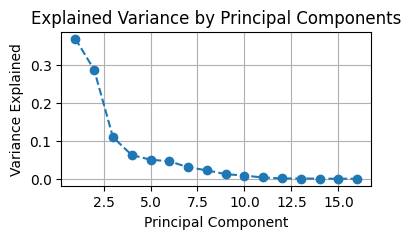

        PC1       PC2       PC3
0 -0.418037  0.336687 -0.295782
1  0.456881  1.821216  0.115663
2  0.493754  1.009214  0.729176
3  0.573310  1.463066  2.837887
4 -1.818987  0.690542 -0.536023
       Region  Spring_tavg  Spring_tmin  Spring_tmax  Spring_prcp  \
PC1  0.068488     0.392502     0.381259     0.384409    -0.198818   
PC2 -0.043593    -0.003269    -0.021658    -0.018367     0.006060   
PC3 -0.037034     0.137721     0.205694     0.049774     0.482577   

     Spring_tsun  Summer_tavg  Summer_tmin  Summer_tmax  Summer_prcp  \
PC1     0.048971    -0.024693    -0.016084    -0.012785    -0.094199   
PC2     0.253011     0.455611     0.442093     0.449428    -0.214312   
PC3    -0.425355     0.056089     0.132397    -0.018080     0.364418   

     Summer_tsun  Fall_tavg  Fall_tmin  Fall_tmax  Fall_prcp  Fall_tsun  
PC1    -0.146981   0.370969   0.315211   0.382563  -0.149228   0.262844  
PC2     0.407662   0.139684   0.201897   0.066170   0.117071  -0.194273  
PC3    -0.148505   0

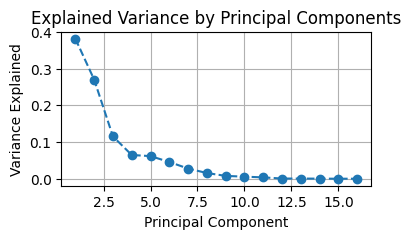

        PC1       PC2       PC3
0  1.151648  2.692835  0.380488
1 -0.242583  1.129814  1.143076
2 -1.549297 -0.073113  0.116170
3 -1.386446 -0.068321  0.266295
4 -0.879837  1.955100 -1.186601
       Region  Spring_tavg  Spring_tmin  Spring_tmax  Spring_prcp  \
PC1  0.039876     0.389876     0.380264     0.385516    -0.105445   
PC2  0.050098    -0.004074    -0.031137    -0.013201     0.067547   
PC3 -0.003219     0.078181     0.154355     0.000359     0.549839   

     Spring_tsun  Summer_tavg  Summer_tmin  Summer_tmax  Summer_prcp  \
PC1     0.079964    -0.029499    -0.035867     0.002475    -0.128806   
PC2     0.264635     0.469555     0.452184     0.468720    -0.178444   
PC3    -0.376023     0.039993     0.109286    -0.018277     0.391245   

     Summer_tsun  Fall_tavg  Fall_tmin  Fall_tmax  Fall_prcp  Fall_tsun  
PC1    -0.120391   0.379213   0.330036   0.385945  -0.097651   0.302005  
PC2     0.431439   0.101221   0.142696   0.053170   0.111403  -0.115142  
PC3    -0.086310   0

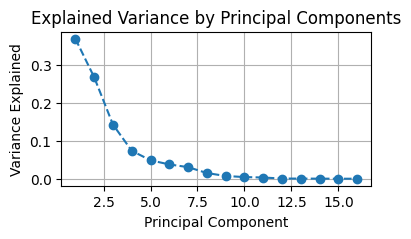

        PC1       PC2       PC3
0 -1.548111  0.735182 -3.615253
1  1.998542  0.532836 -0.173331
2 -1.429865  1.159388 -1.282617
3  0.050570 -0.050444 -0.247093
4 -8.976241  0.103159 -2.632087
       Region  Spring_tavg  Spring_tmin  Spring_tmax  Spring_prcp  \
PC1 -0.024485     0.366606     0.365017     0.331738    -0.049086   
PC2 -0.156254    -0.187322    -0.171743    -0.237578     0.203731   
PC3 -0.023490    -0.050980    -0.117691     0.021168    -0.462795   

     Spring_tsun  Summer_tavg  Summer_tmin  Summer_tmax  Summer_prcp  \
PC1     0.059148     0.221377     0.233272     0.208654    -0.127655   
PC2     0.125023     0.393466     0.377011     0.380224    -0.076213   
PC3     0.540367     0.024567    -0.028961     0.090009    -0.460632   

     Summer_tsun  Fall_tavg  Fall_tmin  Fall_tmax  Fall_prcp  Fall_tsun  
PC1     0.044897   0.395841   0.377745   0.370328   0.058896   0.102663  
PC2     0.440664  -0.044013   0.025149  -0.131601   0.213595  -0.300652  
PC3     0.187684  -0

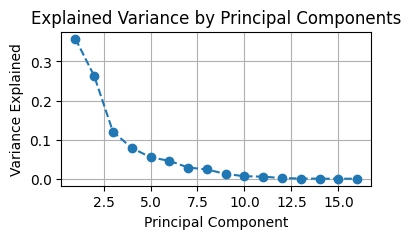

        PC1       PC2       PC3
0 -0.741497 -0.561731 -0.095417
1  2.192575 -8.412364  0.371600
2 -1.172973 -1.523747 -1.053502
3  1.264373  2.042767  0.122613
4 -0.456942  1.239883  1.965138
       Region  Spring_tavg  Spring_tmin  Spring_tmax  Spring_prcp  \
PC1  0.000090     0.386238     0.374445     0.378348    -0.155031   
PC2 -0.175889     0.008112    -0.010033    -0.011617    -0.052217   
PC3  0.336874     0.151729     0.150963     0.118961     0.514621   

     Spring_tsun  Summer_tavg  Summer_tmin  Summer_tmax  Summer_prcp  \
PC1     0.056861    -0.091233    -0.094178    -0.052199    -0.135994   
PC2     0.245812     0.460337     0.449986     0.455512    -0.167130   
PC3    -0.246900     0.110681     0.109951     0.108326     0.404739   

     Summer_tsun  Fall_tavg  Fall_tmin  Fall_tmax  Fall_prcp  Fall_tsun  
PC1    -0.169974   0.360232   0.303492   0.384307  -0.145879   0.286437  
PC2     0.406827   0.169391   0.204360   0.106340   0.074898  -0.053923  
PC3    -0.035613   0

In [17]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

for i, [name, df] in enumerate(file_names):
  print('★',name)

  features = ['Region',
      'Spring_tavg', 'Spring_tmin', 'Spring_tmax', 'Spring_prcp', 'Spring_tsun',
            'Summer_tavg', 'Summer_tmin', 'Summer_tmax', 'Summer_prcp', 'Summer_tsun',
            'Fall_tavg', 'Fall_tmin', 'Fall_tmax', 'Fall_prcp', 'Fall_tsun'
  ]

  # 提取特征数据
  X = df[features]

  # 标准化特征
  X_scaled = StandardScaler().fit_transform(X)

  # 创建 PCA 对象并拟合
  pca = PCA()
  X_pca = pca.fit_transform(X_scaled)

  # 查看各主成分的方差解释比率
  explained_variance = pca.explained_variance_ratio_
  print("Explained Variance Ratio:", explained_variance)

  # 画出主成分的方差解释比率
  plt.figure(figsize=(4, 2))
  plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
  plt.title('Explained Variance by Principal Components')
  plt.xlabel('Principal Component')
  plt.ylabel('Variance Explained')
  plt.grid()
  plt.show()

  # 选择主成分数
  n_components = 3  # 选择主成分的数量
  pca = PCA(n_components=n_components)
  X_pca_selected = pca.fit_transform(X_scaled)

  # 创建一个 DataFrame 包含选择的主成分
  principal_components_df = pd.DataFrame(data=X_pca_selected, columns=[f'PC{i+1}' for i in range(n_components)])

  # 显示结果
  print(principal_components_df.head())

  components = pd.DataFrame(pca.components_, columns=features, index=[f'PC{i+1}' for i in range(len(pca.components_))])

  print(components)
  print('-'*100,'\n')


In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import pandas as pd

for i, [name, df] in enumerate(file_names):
  print('★',name)

  X = df.drop(columns=['Rating','Name'])
  y = df['Rating']

  # 步驟1：標準化
  scaler = StandardScaler()
  X_scaled = scaler.fit_transform(X)

  # 步驟2：PCA
  pca = PCA(n_components=0.95)  # 保留95%的變異
  X_pca = pca.fit_transform(X_scaled)

  # 步驟3：分割數據
  X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

  # 步驟4：建模
  model = LinearRegression()
  model.fit(X_train, y_train)

  # 步驟5：預測
  y_pred = model.predict(X_test)

  # 評估模型性能
  from sklearn.metrics import mean_squared_error
  mse = mean_squared_error(y_test, y_pred)
  print("Mean Squared Error:", mse)

  print('\n5-fold cross-validation')
  # 步驟4：交叉驗證
  # 使用 5 折交叉驗證來計算平均的 MSE
  cv_scores = cross_val_score(model, X_pca, y, cv=5, scoring='neg_mean_squared_error')

  # 計算平均 MSE (neg_mean_squared_error 會返回負值，因此需要取負)
  mean_mse = -cv_scores.mean()

  print(f"Cross-validated Mean Squared Error: {mean_mse}")
  print('-'*100,'\n')

★ Red_Season.csv
Mean Squared Error: 0.06720685472741371

5-fold cross-validation
Cross-validated Mean Squared Error: 0.071743009058674
---------------------------------------------------------------------------------------------------- 

★ White_Season.csv
Mean Squared Error: 0.05148481188179222

5-fold cross-validation
Cross-validated Mean Squared Error: 0.05642534958393998
---------------------------------------------------------------------------------------------------- 

★ Rose_Season.csv
Mean Squared Error: 0.07152524700155584

5-fold cross-validation
Cross-validated Mean Squared Error: 0.07974608207494147
---------------------------------------------------------------------------------------------------- 

★ Sparkling_Season.csv
Mean Squared Error: 0.029915912369018322

5-fold cross-validation
Cross-validated Mean Squared Error: 0.05584568518494355
---------------------------------------------------------------------------------------------------- 



In [21]:
# 引入所需的套件
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

for i, [name, df] in enumerate(file_names):
  print('★',name)

  features = [
      'Spring_tavg', 'Spring_tmin', 'Spring_tmax', 'Spring_prcp', 'Spring_tsun',
      'Summer_tavg', 'Summer_tmin', 'Summer_tmax', 'Summer_prcp', 'Summer_tsun',
      'Fall_tavg', 'Fall_tmin', 'Fall_tmax', 'Fall_prcp', 'Fall_tsun'
  ]

  # 假設你的數據框是 df，其中 'Rating' 是目標變數，features 是特徵列表
  X = df[features]  # 特徵數據
  y = df['Rating']  # 目標變數

  # 將數據分為訓練集和測試集
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # 初始化隨機森林回歸模型
  rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

  # 訓練模型
  rf_regressor.fit(X_train, y_train)

  # 預測測試集
  y_pred = rf_regressor.predict(X_test)

  # 計算均方誤差（MSE）
  mse = mean_squared_error(y_test, y_pred)
  print(f"Mean Squared Error: {mse}")

  print('\nFeature_Importance')
  # 如果你想查看特徵的重要性，可以這樣做
  feature_importances = rf_regressor.feature_importances_
  for feature, importance in zip(features, feature_importances):
      print(f"{feature}: {importance:.4f}")

  print('\n5-fold cross-validation')
  # 使用 5 折交叉驗證
  cv_scores = cross_val_score(rf_regressor, X, y, cv=5, scoring='neg_mean_squared_error')

  # 計算交叉驗證的 MSE (neg_mean_squared_error 會返回負值，所以取相反值)
  cv_mse = -cv_scores.mean()

  print(f"Cross-validated MSE: {cv_mse}")
  print('-'*100,'\n')

★ Red_Season.csv
Mean Squared Error: 0.06822400662458687

Feature_Importance
Spring_tavg: 0.0505
Spring_tmin: 0.0570
Spring_tmax: 0.0656
Spring_prcp: 0.0698
Spring_tsun: 0.0763
Summer_tavg: 0.0493
Summer_tmin: 0.0547
Summer_tmax: 0.0498
Summer_prcp: 0.0795
Summer_tsun: 0.1063
Fall_tavg: 0.0615
Fall_tmin: 0.0601
Fall_tmax: 0.0529
Fall_prcp: 0.0783
Fall_tsun: 0.0885

5-fold cross-validation
Cross-validated MSE: 0.07229893891692471
---------------------------------------------------------------------------------------------------- 

★ White_Season.csv
Mean Squared Error: 0.05597418266179876

Feature_Importance
Spring_tavg: 0.0438
Spring_tmin: 0.0619
Spring_tmax: 0.0926
Spring_prcp: 0.0628
Spring_tsun: 0.0678
Summer_tavg: 0.0382
Summer_tmin: 0.0492
Summer_tmax: 0.0605
Summer_prcp: 0.0608
Summer_tsun: 0.1009
Fall_tavg: 0.0425
Fall_tmin: 0.0754
Fall_tmax: 0.0519
Fall_prcp: 0.0712
Fall_tsun: 0.1206

5-fold cross-validation
Cross-validated MSE: 0.06137927079453685
-----------------------------

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

for i, [name, df] in enumerate(file_names):
    print('★',name)

    X = df.drop(columns=['Rating', 'Name'])
    y = df['Rating']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = Sequential()

    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='linear'))

    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

    history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=64, validation_split=0.2, verbose=1)

    y_pred = model.predict(X_test_scaled)

    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error: {mse}\n")


#model.save('wine_rating_model.h5')

In [24]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd

for i, [name, df] in enumerate(file_names):
  print('★',name)

  # 假設你有一個DataFrame Red
  X = df[['Spring_tavg', 'Spring_tmin', 'Spring_tmax', 'Spring_prcp', 'Spring_tsun',
            'Summer_tavg', 'Summer_tmin', 'Summer_tmax', 'Summer_prcp', 'Summer_tsun',
            'Fall_tavg', 'Fall_tmin', 'Fall_tmax', 'Fall_prcp', 'Fall_tsun']]
  y = df['Rating']

  # 分割數據集
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # Lasso 回歸
  lasso = LassoCV(cv=5)  # 使用 5 折交叉驗證
  lasso.fit(X_train, y_train)

  # 顯示非零係數的特徵
  selected_features = X.columns[lasso.coef_ != 0]
  print("Selected Features:", selected_features)

  # 這裡我們只保留選定的特徵並重訓練模型
  X_train_selected = X_train[selected_features]
  X_test_selected = X_test[selected_features]

  # 使用選定的特徵進行預測
  lasso_selected = LassoCV(cv=5)  # 重新實例化Lasso模型
  lasso_selected.fit(X_train_selected, y_train)  # 使用選定的特徵擬合模型
  y_pred = lasso_selected.predict(X_test_selected)  # 使用選定的特徵進行預測

  # 計算並顯示 MSE
  final_mse = mean_squared_error(y_test, y_pred)
  print("Final MSE:", final_mse)
  print('-'*100,'\n')

★ Red_Season.csv
Selected Features: Index(['Spring_tsun', 'Summer_tsun', 'Fall_tsun'], dtype='object')
Final MSE: 0.09034149497585434
---------------------------------------------------------------------------------------------------- 

★ White_Season.csv
Selected Features: Index(['Spring_tsun', 'Summer_tsun', 'Fall_tsun'], dtype='object')
Final MSE: 0.061525853614642106
---------------------------------------------------------------------------------------------------- 

★ Rose_Season.csv
Selected Features: Index(['Spring_tsun', 'Summer_tsun', 'Fall_tsun'], dtype='object')
Final MSE: 0.08046922799355774
---------------------------------------------------------------------------------------------------- 

★ Sparkling_Season.csv
Selected Features: Index(['Summer_tsun', 'Fall_tsun'], dtype='object')
Final MSE: 0.0711113319873766
---------------------------------------------------------------------------------------------------- 



In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

for i, [name, df] in enumerate(file_names):
  print('★',name)
  # 計算 VIF
  X = df[['Spring_tavg', 'Spring_tmin', 'Spring_tmax', 'Spring_prcp', 'Spring_tsun',
            'Summer_tavg', 'Summer_tmin', 'Summer_tmax', 'Summer_prcp', 'Summer_tsun',
            'Fall_tavg', 'Fall_tmin', 'Fall_tmax', 'Fall_prcp', 'Fall_tsun']]

  vif_data = pd.DataFrame()
  vif_data["feature"] = X.columns
  vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

  print(vif_data)
  print('\n')


★ Red_Season.csv
        feature           VIF
0   Spring_tavg  12999.985102
1   Spring_tmin   1706.599387
2   Spring_tmax   6643.598043
3   Spring_prcp     11.836317
4   Spring_tsun    547.249176
5   Summer_tavg  23466.211651
6   Summer_tmin   4440.262336
7   Summer_tmax   9312.291762
8   Summer_prcp      6.174842
9   Summer_tsun    677.992647
10    Fall_tavg  17963.655878
11    Fall_tmin   2913.953238
12    Fall_tmax   8354.596803
13    Fall_prcp      8.739339
14    Fall_tsun    253.731361


★ White_Season.csv
        feature           VIF
0   Spring_tavg  12960.125922
1   Spring_tmin   1872.297984
2   Spring_tmax   6176.857319
3   Spring_prcp     14.662900
4   Spring_tsun    530.872598
5   Summer_tavg  26123.115465
6   Summer_tmin   5092.926397
7   Summer_tmax   9701.727081
8   Summer_prcp      9.021619
9   Summer_tsun    522.380249
10    Fall_tavg  14346.887829
11    Fall_tmin   2302.877503
12    Fall_tmax   6866.743530
13    Fall_prcp      9.499137
14    Fall_tsun    214.810387


